# **Catatan**

- Kode program 2 adalah kalian tinggal running kode ini agar dapat melihat training dengan data asli dibersihkan, kemudian dievaluasi hasilnya dan dicatat. (running sendiri ya, kalau ada error screenshot kirim ke wa saya)
- hasil training dengan data bersih (classification non-tuning) dibandingkan dengan hasil training data bersih menggunakan hyperparameter tuning
- metric evaluasinya harus ada accuracy, precision, recall, dan f1-score

Kode ini untuk Topik ini:
- Phishing URL Detection Using BERT-Based Transformer Models
Topik Riset:
"Deteksi URL Phishing dengan Model Transformer Berbasis BERT: Studi Kasus Analisis URL dan Email"
Deskripsi:
Model BERT (Bidirectional Encoder Representations from Transformers) digunakan untuk memahami konteks URL atau teks email yang mencurigakan. Model ini dapat menganalisis karakter URL dan teks email untuk membedakan apakah mereka merupakan phishing atau tidak berdasarkan pola yang diidentifikasi dari dataset phishing.
Novelty: Sedang. Meskipun deteksi phishing berbasis URL sudah diteliti cukup luas, penggunaan BERT untuk klasifikasi URL secara mendalam masih relatif baru. Namun, karena banyak model sudah menggunakan BERT untuk analisis teks, tingkat novelty bisa lebih tinggi jika dilakukan kombinasi fitur tambahan seperti analisis perilaku pengguna.
Dataset: Malicious URL Dataset
Dataset ini berisi jutaan URL berbahaya, termasuk yang digunakan untuk phishing. BERT, sebagai model Transformer, dapat digunakan untuk memahami pola karakteristik URL dan memprediksi kemungkinan serangan phishing.
URL: Malicious URL Dataset​(GitHub)


# **Importing Modules and Libraries**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

Mount Google Drive:

Digunakan untuk mengakses file yang disimpan di Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls


Mounted at /content/gdrive
gdrive	sample_data


Mengubah direktori kerja:

Ini digunakan untuk berpindah ke folder tempat dataset Anda berada.

In [ ]:
import os
os.chdir("/content/gdrive/My Drive/ASDOS/template/Topik4_Phishing URL Detection Using BERT-Based Transformer Models/dataset")
!ls


malicious_phish.csv


Memuat dataset:

Dataset UNSW_NB15.csv dimuat ke dalam variabel data.

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/ASDOS/template/Topik4_Phishing URL Detection Using BERT-Based Transformer Models/dataset/malicious_phish.csv')



Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [ ]:
data.head(n=5)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
# Misalkan kolom yang berisi label adalah 'type'
# Menampilkan nilai unik dan jumlah setiap kelas
kelas = data['type'].value_counts()
print(kelas)

# Menampilkan jumlah kelas unik
jumlah_kelas = data['type'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")


type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64
Jumlah kelas unik: 4


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
data.shape


(651191, 2)

Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

In [ ]:
print(data.columns)


Index(['url', 'type'], dtype='object')


In [ ]:
print(data['type'].value_counts())


type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64


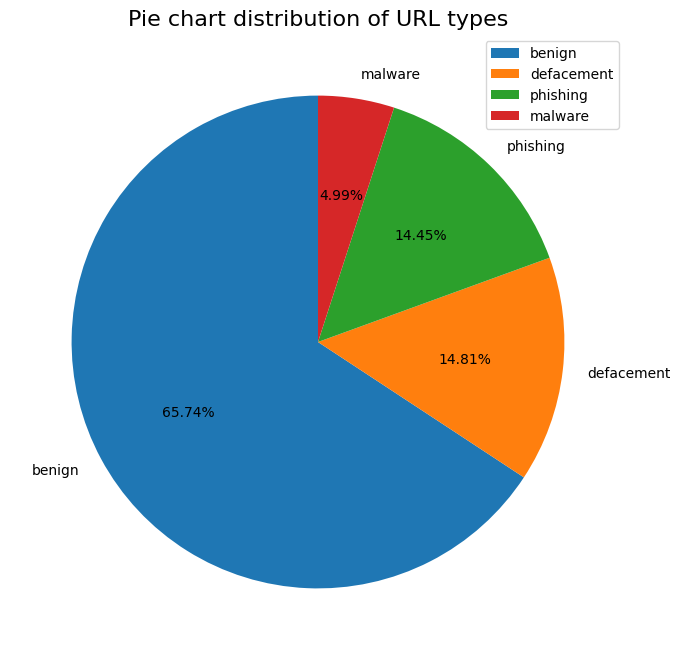

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/gdrive/My Drive/ASDOS/template/Topik4_Phishing URL Detection Using BERT-Based Transformer Models/dataset/malicious_phish.csv')

# Hitung distribusi semua label
label_counts = data['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%0.2f%%', startangle=90)
plt.title("Pie chart distribution of URL types", fontsize=16)
plt.legend()
plt.savefig('/content/gdrive/My Drive/ASDOS/template/Topik4_Phishing URL Detection Using BERT-Based Transformer Models/plot/Pie_chart_all_classes.png')
plt.show()


# **DATA SPLITTING**

In [ ]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/content/gdrive/My Drive/ASDOS/template/Topik4_Phishing URL Detection Using BERT-Based Transformer Models/dataset/malicious_phish.csv')

# Memisahkan fitur dan label
X_multi = data['url']  # Fitur: URL
y_multi = data['type'].map({'benign': 0, 'defacement': 1, 'phishing': 2, 'malware': 3})  # Mengonversi label ke numerik

# Membagi data menjadi set pelatihan (70%) dan set pengujian (30%)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_multi, y_multi, test_size=0.2, random_state=50)

# Menampilkan informasi tentang ukuran set
print(f'Ukuran set pelatihan: {X_train_bin.shape[0]}')
print(f'Ukuran set pengujian: {X_test_bin.shape[0]}')


Ukuran set pelatihan: 520952
Ukuran set pengujian: 130239


# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [ ]:
!pip install transformers tensorflow scikit-learn matplotlib pandas


In [ ]:
!pip install transformers torch scikit-learn


# **2. TRANSFORMER "BERT"**

# **CLASSIFICATION Non-Tuning**

In [ ]:
!pip install transformers


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to clean URLs
def clean_url(url):
    # Remove any unwanted characters or patterns
    url = re.sub(r'http[s]?://', '', url)  # Remove http(s)://
    url = re.sub(r'www\.', '', url)        # Remove www.
    url = re.sub(r'\?.*$', '', url)        # Remove query strings
    url = re.sub(r'\d+', '', url)          # Remove numbers
    url = re.sub(r'[^a-zA-Z\.]', ' ', url) # Remove non-alphabetic characters
    return url.strip()

# 1. Load dataset
data = pd.read_csv('/content/gdrive/My Drive/ASDOS/template/Topik4_Phishing URL Detection Using BERT-Based Transformer Models/dataset/malicious_phish.csv')

# Clean the URLs
data['url'] = data['url'].apply(clean_url)

# Memisahkan fitur dan label
X = data['url']  # Fitur: URL
y = data['type'].map({'benign': 0, 'defacement': 1, 'phishing': 2, 'malware': 3})  # Mengonversi label ke numerik

# 2. Inisialisasi Tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 3. KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Tokenisasi dan pembuatan tensor
    train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='pt', max_length=128)
    val_encodings = tokenizer(list(X_val), truncation=True, padding=True, return_tensors='pt', max_length=128)

    # Convert labels to tensors
    y_train_tensor = torch.LongTensor(y_train.values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize BERT model
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(y.unique()))
    model.to('cuda' if torch.cuda.is_available() else 'cpu')  # Pindahkan model ke device yang sesuai
    optimizer = AdamW(model.parameters(), lr=5e-5)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 3
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to('cuda'), attention_mask.to('cuda'), labels.to('cuda')
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            val_input_ids = val_encodings['input_ids'].to('cuda')
            val_attention_mask = val_encodings['attention_mask'].to('cuda')
            outputs = model(val_input_ids, attention_mask=val_attention_mask)
            y_pred = torch.argmax(outputs.logits, dim=1)

        accuracy = accuracy_score(y_val, y_pred.cpu())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            model.save_pretrained(f'model_best_fold_{fold + 1}')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.cpu())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.cpu(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.cpu(), target_names=['benign', 'defacement', 'phishing', 'malware'])
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=['benign', 'defacement', 'phishing', 'malware'], yticklabels=['benign', 'defacement', 'phishing', 'malware'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=['benign', 'defacement', 'phishing', 'malware'], yticklabels=['benign', 'defacement', 'phishing', 'malware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# **Hyperparameter Tuning**

In [ ]:
!pip install optuna


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import matplotlib.pyplot as plt
import seaborn as sns
import re
from itertools import product

# Function to clean URLs
def clean_url(url):
    # Remove unwanted characters or patterns
    url = re.sub(r'http[s]?://', '', url)
    url = re.sub(r'www\.', '', url)
    url = re.sub(r'\?.*$', '', url)
    url = re.sub(r'\d+', '', url)
    url = re.sub(r'[^a-zA-Z\.]', ' ', url)
    return url.strip()

# Function to train and evaluate the model
def train_and_evaluate(learning_rate, batch_size, num_epochs):
    # 1. Load dataset
    data = pd.read_csv('/content/gdrive/My Drive/ASDOS/template/Topik4_Phishing URL Detection Using BERT-Based Transformer Models/dataset/malicious_phish.csv')

    # Clean the URLs
    data['url'] = data['url'].apply(clean_url)

    # Memisahkan fitur dan label
    X = data['url']
    y = data['type'].map({'benign': 0, 'defacement': 1, 'phishing': 2, 'malware': 3})

    # 2. Inisialisasi Tokenizer BERT
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # KFold Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=50)
    all_accuracy, all_f1_scores = [], []

    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        print(f'Fold {fold + 1}')

        # Split data
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Tokenisasi dan pembuatan tensor
        train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='pt', max_length=128)
        val_encodings = tokenizer(list(X_val), truncation=True, padding=True, return_tensors='pt', max_length=128)

        # Convert labels to tensors
        y_train_tensor = torch.LongTensor(y_train.values)
        y_val_tensor = torch.LongTensor(y_val.values)

        # Create DataLoader
        train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        # Initialize BERT model
        model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(y.unique()))
        model.to('cuda' if torch.cuda.is_available() else 'cpu')
        optimizer = AdamW(model.parameters(), lr=learning_rate)

        # Train the model
        num_epochs = num_epochs
        best_accuracy = 0

        for epoch in range(num_epochs):
            model.train()
            epoch_loss = 0
            for batch in train_loader:
                optimizer.zero_grad()
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to('cuda'), attention_mask.to('cuda'), labels.to('cuda')
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

        # Validate the model
        model.eval()
        with torch.no_grad():
            val_input_ids = val_encodings['input_ids'].to('cuda')
            val_attention_mask = val_encodings['attention_mask'].to('cuda')
            outputs = model(val_input_ids, attention_mask=val_attention_mask)
            y_pred = torch.argmax(outputs.logits, dim=1)

        accuracy = accuracy_score(y_val, y_pred.cpu())
        all_accuracy.append(accuracy)

    # Return the average accuracy across all folds
    return np.mean(all_accuracy)

# Define hyperparameter grid
learning_rates = [1e-5, 5e-5]
batch_sizes = [8, 16]
num_epochs_list = [5, 10]

# Store results
results = {}

# Iterate over all combinations of hyperparameters
for learning_rate, batch_size, num_epochs in product(learning_rates, batch_sizes, num_epochs_list):
    print(f'Tuning with Learning Rate: {learning_rate}, Batch Size: {batch_size}, Num Epochs: {num_epochs}')
    avg_accuracy = train_and_evaluate(learning_rate, batch_size, num_epochs)
    results[(learning_rate, batch_size, num_epochs)] = avg_accuracy
    print(f'Average Accuracy: {avg_accuracy * 100:.2f}%\n')

# Find the best hyperparameters
best_params = max(results, key=results.get)
print(f'Best Hyperparameters: Learning Rate: {best_params[0]}, Batch Size: {best_params[1]}, Num Epochs: {best_params[2]}')
print(f'Best Average Accuracy: {results[best_params] * 100:.2f}%')


# **CLASSIFICATION With Hyperparameter Tuning**
(ganti parameter sesuai yang terbaik hasil hyperparameter tuning ya)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to clean URLs
def clean_url(url):
    # Remove any unwanted characters or patterns
    url = re.sub(r'http[s]?://', '', url)  # Remove http(s)://
    url = re.sub(r'www\.', '', url)        # Remove www.
    url = re.sub(r'\?.*$', '', url)        # Remove query strings
    url = re.sub(r'\d+', '', url)          # Remove numbers
    url = re.sub(r'[^a-zA-Z\.]', ' ', url) # Remove non-alphabetic characters
    return url.strip()

# 1. Load dataset
data = pd.read_csv('/content/gdrive/My Drive/ASDOS/template/Topik4_Phishing URL Detection Using BERT-Based Transformer Models/dataset/malicious_phish.csv')

# Clean the URLs
data['url'] = data['url'].apply(clean_url)

# Memisahkan fitur dan label
X = data['url']  # Fitur: URL
y = data['type'].map({'benign': 0, 'defacement': 1, 'phishing': 2, 'malware': 3})  # Mengonversi label ke numerik

# 2. Inisialisasi Tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Tokenisasi dan pembuatan tensor
    train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='pt', max_length=128)
    val_encodings = tokenizer(list(X_val), truncation=True, padding=True, return_tensors='pt', max_length=128)

    # Convert labels to tensors
    y_train_tensor = torch.LongTensor(y_train.values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize BERT model
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(y.unique()))
    model.to('cuda' if torch.cuda.is_available() else 'cpu')  # Pindahkan model ke device yang sesuai
    optimizer = AdamW(model.parameters(), lr=5e-5)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 3
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to('cuda'), attention_mask.to('cuda'), labels.to('cuda')
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            val_input_ids = val_encodings['input_ids'].to('cuda')
            val_attention_mask = val_encodings['attention_mask'].to('cuda')
            outputs = model(val_input_ids, attention_mask=val_attention_mask)
            y_pred = torch.argmax(outputs.logits, dim=1)

        accuracy = accuracy_score(y_val, y_pred.cpu())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            model.save_pretrained(f'model_best_fold_{fold + 1}')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.cpu())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.cpu(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.cpu(), target_names=['benign', 'defacement', 'phishing', 'malware'])
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=['benign', 'defacement', 'phishing', 'malware'], yticklabels=['benign', 'defacement', 'phishing', 'malware'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=['benign', 'defacement', 'phishing', 'malware'], yticklabels=['benign', 'defacement', 'phishing', 'malware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
